In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
sns.set(font_scale=1.5)

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score,\
precision_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.pipeline import Pipeline

# from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_precision_recall_curve
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_app = pd.read_csv('AppleStore.csv')
df_description = pd.read_csv('appleStore_description.csv')

## Content
### appleStore.csv
1. "id" : App ID
2. "track_name": App Name
3. "size_bytes": Size (in Bytes)
4. "currency": Currency Type
5. "price": Price amount
6. "ratingcounttot": User Rating counts (for all version)
7. "ratingcountver": User Rating counts (for current version)
8. "user_rating" : Average User Rating value (for all version)
9. "userratingver": Average User Rating value (for current version)
10. "ver" : Latest version code
11. "cont_rating": Content Rating (Age)
12. "prime_genre": Primary Genre
13. "sup_devices.num": Number of supporting devices
14. "ipadSc_urls.num": Number of screenshots showed for display
15. "lang.num": Number of supported languages
16. "vpp_lic": Vpp Device Based Licensing Enabled (Can be bought by organisations in bulk)

### appleStore_description.csv
1. id : App ID
2. track_name: Application name
3. size_bytes: Memory size (in Bytes)
4. app_desc: Application description

## Read Dataset

In [3]:
df_app.isna().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [4]:
df_description.isna().sum()

id            0
track_name    0
size_bytes    0
app_desc      0
dtype: int64

- There aren't null values in the dataset

In [5]:
df_app.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


- Delete Unnamed: 0 columns

In [6]:
df_app = df_app.iloc[:, 1:]

In [7]:
df_app.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [8]:
df_description.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [9]:
df_app.shape

(7197, 16)

In [10]:
df_description.shape

(7197, 4)

- Both datasets have the same number of rows, therefore we can merge the dataset

## Merge Dataset

In [11]:
df_app['app_desc'] = df_description['app_desc']

In [12]:
df_app.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


- Change the unit size into megabytes for convinience

In [13]:
df_app['size_bytes_in_MB'] = df_app['size_bytes'] / (1024 * 1024.0)

In [14]:
df_app.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,size_bytes_in_MB
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.119141
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,151.232422
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,95.867188
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,122.558594
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.476562


## isNotFree

In [15]:
df_app['isNotFree'] = df_app['price'].apply(lambda x : 1 if x > 0 else 0)

In [16]:
df_app.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,size_bytes_in_MB,isNotFree
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.119141,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,151.232422,0
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,95.867188,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,122.558594,0
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.476562,0


In [17]:
df_app['success'] = df_app['user_rating'].apply(lambda x : 1 if x >= 4 else 0)

In [18]:
df_app.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,size_bytes_in_MB,isNotFree,success
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.119141,1,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,151.232422,0,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,95.867188,0,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,122.558594,0,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.476562,0,1


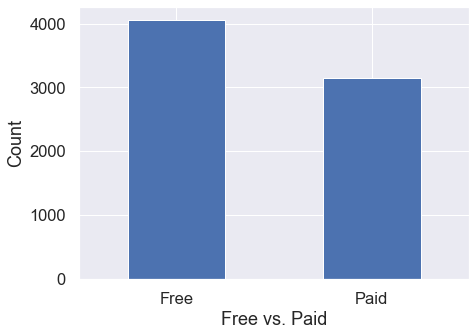

In [19]:
plt.figure(figsize=(7, 5))
df_app['isNotFree'].value_counts().plot.bar()
plt.xlabel('Free vs. Paid')
plt.ylabel('Count')
x_isNotFree = [0,1]
squad = ['Free','Paid']
plt.xticks(x_isNotFree, squad, rotation=0)
plt.show()

In [20]:
df_app_notfree = df_app[df_app['isNotFree'] == 1]
df_app_free = df_app[df_app['isNotFree'] == 0]

In [21]:
print('There are {} Not-Free Apps in this dataset'.format(df_app_notfree.shape[0]))
print('There are {} Free Apps in this dataset'.format(df_app_free.shape[0]))

There are 3141 Not-Free Apps in this dataset
There are 4056 Free Apps in this dataset


## Countplot for each type of prime_genre

<AxesSubplot:>

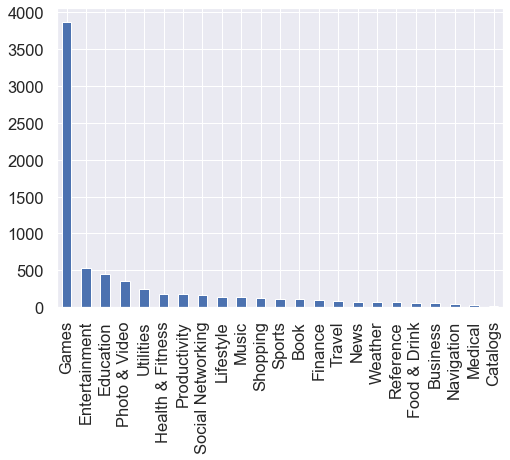

In [22]:
df_app['prime_genre'].value_counts().plot.bar()

- Games are the most numerous followed by entertainment, education and Photo & Video

### Countplot for each type of prime_genre (Free vs. Not Free)

<AxesSubplot:>

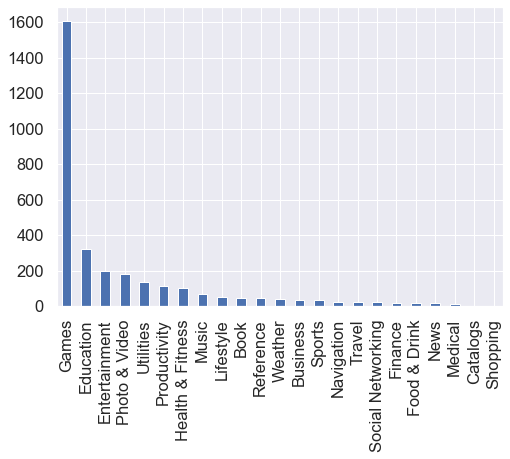

In [23]:
df_app_notfree['prime_genre'].value_counts().plot.bar()

- Games are the most numerous paid apps followed by education, entertainment, and Photo & Video

<AxesSubplot:>

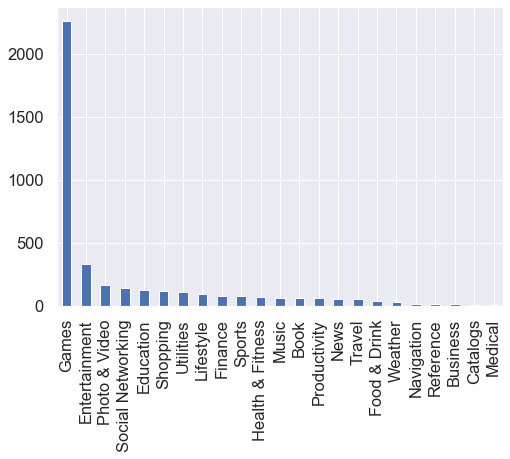

In [24]:
df_app_free['prime_genre'].value_counts().plot.bar()

- Games are the most numerous free apps, followed by entertainment, Photo & Video, and Social Networking

In [25]:
df_app["prime_genre"].value_counts()[:5]

Games            3862
Entertainment     535
Education         453
Photo & Video     349
Utilities         248
Name: prime_genre, dtype: int64

<AxesSubplot:xlabel='prime_genre', ylabel='count'>

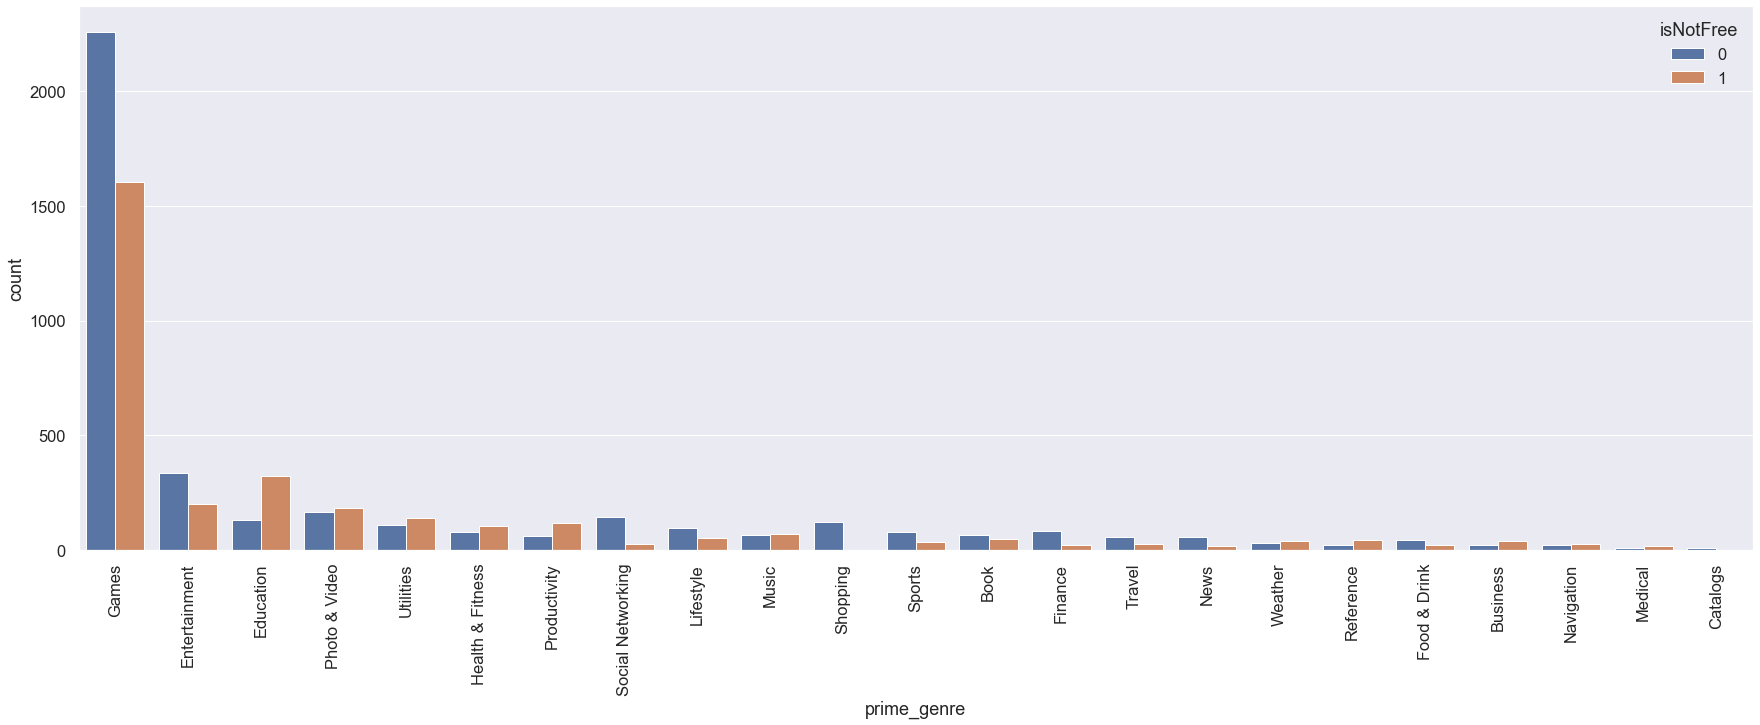

In [26]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.countplot(x="prime_genre", hue="isNotFree", data=df_app, order=df_app["prime_genre"].value_counts().index)

- Games, entertainment, education, Photo & Video, and Utilities are the top 5 numerous app categories on the app store
- Most games and entertainment apps are free
- Most educational apps are paid apps
- Around half of Photo & Video, utilities and Health & Fitness apps are paid
- Many productivity apps are paid
- Most social networking apps are free
- Almost all shopping apps are free

## Paid Shopping App

In [27]:
df_app[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Shopping')]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,size_bytes_in_MB,isNotFree,success
263,340779800,The Christmas List,26137600,USD,1.99,2722,1,4.5,5.0,2.1,4+,Shopping,37,0,1,1,The #1 Shopping App in the US – The Christmas ...,24.926758,1,1


## Free Shopping App

In [28]:
for app in df_app.loc[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Shopping'), 'track_name'].values:
    print(app)

eBay: Best App to Buy, Sell, Save! Online Shopping
Target
Amazon App: shop, scan, compare, and read reviews
Best Buy
Whole Foods Market
Gilt
Walgreens – Pharmacy, Photo, Coupons and Shopping
Kmart – Download Now, Shop Online & Pick Up Today!
Victoria’s Secret – The Sexiest Bras & Lingerie
Walmart: Free 2-Day Shipping,* Easy Store Shopping
Shop Savvy Barcode Scanner - Price Compare & Deals
Macy's
Groupon - Deals, Coupons & Discount Shopping App
ヤフオク! 利用者数NO.1のオークション、フリマアプリ
Apple Store
Vestiaire Collective - Pre-Owned Luxury Fashion
Sam's Club: Wholesale Shopping & Bulk Buy Deals
eBay Kleinanzeigen - Free. Easy. Local.
shopkick - Shopping Rewards & Discounts
淘宝 - 随时随地，想淘就淘
Zappos: shop shoes & clothes, fast free shipping
Sephora Makeup & Beauty App – Insider Tips & Style
CVS Pharmacy
Black Friday 2017 Ads App - BlackFriday.fm
ファッション通販 ZOZOTOWN
手机京东-首次购买可领取188元优惠券
唯品会-欢乐颂2独家电商 同款热卖
苏宁易购-新人专享大礼包
Showroomprive - Private Fashion Sales
1号店-全球超市 轻松到家
美丽说-潮流穿搭快人一步
京东 HD
AliExpress Shopping App


In [138]:
for app in df_app.loc[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Shopping'), 'user_rating'].values:
    print(app)

4.0
3.0
3.5
4.0
3.0
3.5
4.5
3.5
3.5
3.0
2.5
3.5
4.5
3.0
3.5
4.0
4.0
4.5
4.5
4.0
5.0
4.5
4.0
4.5
0.0
3.5
4.5
3.0
4.0
3.5
4.5
4.0
4.0
3.5
3.0
5.0
5.0
4.0
4.0
4.5
4.5
4.0
4.5
0.0
4.0
4.0
4.5
4.5
4.5
4.5
4.0
4.5
4.5
5.0
4.5
0.0
3.0
4.0
4.5
4.5
5.0
4.0
0.0
3.0
4.0
4.5
0.0
2.5
4.5
4.5
3.5
4.5
4.5
4.0
5.0
4.5
4.0
4.5
5.0
3.5
3.5
4.5
4.0
0.0
2.5
4.0
4.5
0.0
0.0
4.5
0.0
3.5
3.0
4.5
4.5
0.0
3.0
4.5
4.5
4.5
3.5
4.5
5.0
2.5
4.5
2.5
4.5
5.0
0.0
4.0
5.0
4.5
5.0
5.0
4.0
0.0
0.0
0.0
4.5
0.0
0.0


### Mean user rating of free shopping app

In [142]:
df_app[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Shopping')]['user_rating'].mean()

3.5330578512396693

## Free Social Media App

In [29]:
for app in df_app.loc[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Social Networking'), 'track_name'].values:
    print(app)

Facebook
LinkedIn
Skype for iPhone
Tumblr
Match™ - #1 Dating App.
WhatsApp Messenger
TextNow - Unlimited Text + Calls
Grindr - Gay and same sex guys chat, meet and date
imo video calls and chat
Ameba
Weibo
Badoo - Meet New People, Chat, Socialize.
Kik
Qzone
Fake-A-Location Free ™
Tango - Free Video Call, Voice and Chat
MeetMe - Chat and Meet New People
SimSimi
Viber Messenger – Text & Call
Find My Family, Friends & iPhone - Life360 Locator
Weibo HD
POF - Best Dating App for Conversations
GroupMe
出会い系アプリ i-Mail（アイメール）
Lobi
WeChat
YY- 小全民手机直播交友软件
ooVoo – Free Video Call, Text and Voice
Pinterest
知乎
Qzone HD
Skype for iPad
LINE
QQ
LOVOO - Dating Chat
MOMO陌陌-开启视频社交,用直播分享生活
QQ HD
Messenger
eHarmony™ Dating App - Meet Singles
YouNow: Live Stream Video Chat
Cougar Dating & Life Style App for Mature Women
百度贴吧-全球最大兴趣交友社区
Battlefield™ Companion
Whisper - Share, Express, Meet
same - 就是聊得来
We Heart It - Fashion, wallpapers, quotes, tattoos
Followers - Social Analytics For Instagram
Jメール 出会える人気の匿名

## Paid Social Media Apps

In [30]:
for app in df_app.loc[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Social Networking'), 'track_name'].values:
    print(app)

Bowitter for iPhone
Badoo Premium - Meet new people. Extra features.
Fake Location
Who Deleted Me? for Facebook
TeamSpeak 3
Threema
Followers + EA - Analytics for Instagram
VVebo - 微博客户端
feather for Twitter
Repost It! for Instagram Pro - Video Photo Whiz
InsSave - Download & Save Photos & Videos From Instagram With Ease!
Love Msg
Remove Caption for Snapchat* Screenshots
WeicoPro 4
一言-记录字句，发现共鸣
Tweetbot 4 for Twitter
狼人之夜
InsPad - Instagram for iPad
ChatMate for WhatsApp
Todrick
Littlebook - for Facebook on Watch
求恋爱 专业版-高端恋爱相亲婚恋交友神器,同城寂寞单身男女聊天约会找对象平台
Not Karlton Banks Emojis by Eboticons
Demi Lovato Stickers


## Free Music Apps

In [31]:
for app in df_app.loc[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Music'), 'track_name'].values:
    print(app)

Pandora - Music & Radio
Shazam - Discover music, artists, videos & lyrics
iHeartRadio – Free Music & Radio Stations
Deezer - Listen to your Favorite Music & Playlists
Sonos Controller
NRJ Radio
radio.de - Der Radioplayer
Spotify Music
SoundCloud - Music & Audio
Sing Karaoke Songs Unlimited with StarMaker
SoundHound Song Search & Music Player
Ringtones for iPhone & Ringtone Maker
Coach Guitar - Lessons & Easy Tabs For Beginners
QQ音乐-来这里“发现・音乐”
TuneIn Radio - MLB NBA Audiobooks Podcasts Music
Magic Piano by Smule
QQ音乐HD
The Singing Machine Mobile Karaoke App
Bandsintown Concerts
PetitLyrics
edjing Mix:DJ turntable to remix and scratch music
Smule Sing!
Amazon Music
AutoRap by Smule
My Mixtapez Music
Certified Mixtapes - Hip Hop Albums & Mixtapes
Karaoke - Sing Karaoke, Unlimited Songs!
Napster - Top Music & Radio
Musi - Unlimited Music For YouTube
UE BOOM
Spinrilla - Mixtapes For Free
Google Play Music
Piano - Play Keyboard Music Games with Magic Tiles
Bose SoundTouch
DatPiff
Sounds app 

## Paid Music Apps

In [32]:
for app in df_app.loc[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Music'), 'track_name'].values:
    print(app)

Cleartune - Chromatic Tuner
TouchOSC
iReal Pro - Music Book & Play Along
Tempo - Metronome with Setlists
I Am T-Pain 2.0
TuneIn Radio Pro - MLB Audiobooks Podcasts Music
Shazam Encore
Tabs & Chords by Ultimate Guitar - learn and play
forScore
Ringtone Designer Pro - Create Unlimited Ringtones, Text Tones, Email Alerts, and More!
Guitar Pro
FL Studio Mobile
Tenuto
Drum Beats+ (Rhythm Metronome, Loops & Grooves Machine)
Loopy HD
Notion
TonalEnergy Chromatic Tuner and Metronome
Guitar Suite - Metronome, Tuner, and Chords Library for Guitar, Bass, Ukulele
OnSong
Magellan
Real Metronome Pro
UBiO
Cubasis 2 - Mobile Music Creation System
Galileo Organ
LiveTunes - Live Concert Music Player
djay 2
djay 2 for iPhone
TunesFlow - Music Player with Equalizer
Pimp Your Sound
Serato Remote Mini
KORG Gadget
Drillbook Next Reader
MuseScore Songbook - Sheet Music
Disney Karaoke: Frozen
Touch Notation
Pyware 3D Viewer
VOX: FLAC Music Player with MP3 & Equalizer
Cesium Music Player
KORG Module
SOUND Canva

## Prime genre vs user rating

In [33]:
df_group_genre_vs_rating = df_app[['prime_genre', 'user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False)
df_genre_vs_rating = df_group_genre_vs_rating.reset_index()

In [34]:
df_genre_vs_rating

,prime_genre,user_rating
0,Productivity,4.005618
1,Music,3.978261
2,Photo & Video,3.800860
3,Business,3.745614
4,Health & Fitness,3.700000
5,Games,3.685008
6,Weather,3.597222
7,Shopping,3.540984
8,Reference,3.453125
9,Travel,3.376543


<AxesSubplot:xlabel='prime_genre', ylabel='user_rating'>

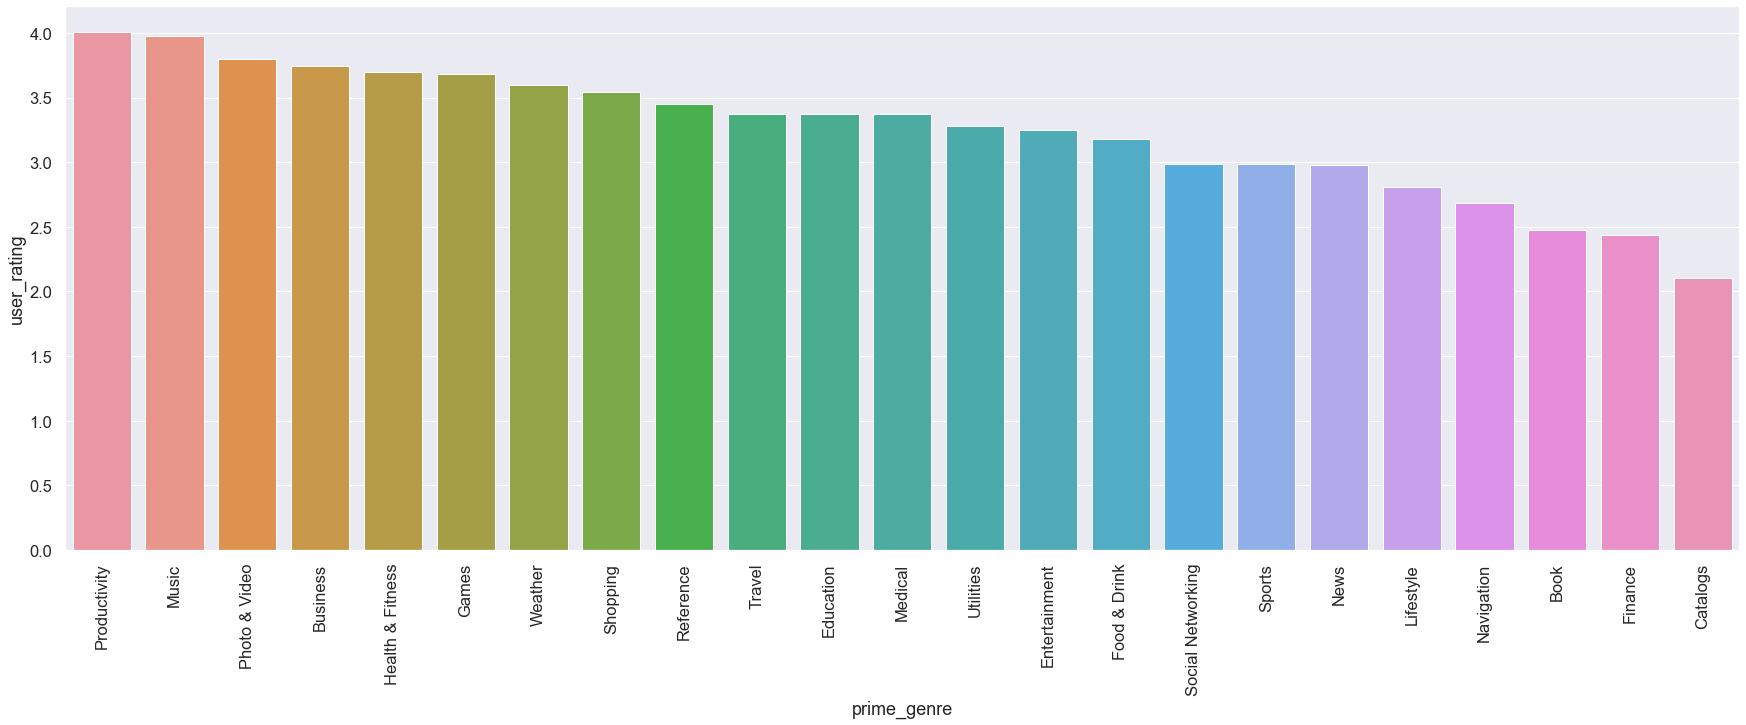

In [35]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x="prime_genre", y="user_rating", data=df_genre_vs_rating)

### Top 10 Rating Grouped by Genre

1. Productivity
2. Music
3. Photo & Video
4. Business
5. Health & Fitness
6. Games
7. Weather
8. Shopping
9. Reference
10. Travel

In [36]:
df_genre_vs_rating[df_genre_vs_rating['user_rating'] > 3.5]

,prime_genre,user_rating
0,Productivity,4.005618
1,Music,3.978261
2,Photo & Video,3.800860
3,Business,3.745614
4,Health & Fitness,3.700000
5,Games,3.685008
6,Weather,3.597222
7,Shopping,3.540984


In [37]:
df_group_genre_vs_rating_free = df_app_free[['prime_genre', 'user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False)
df_genre_vs_rating_free = df_group_genre_vs_rating_free.reset_index()

In [38]:
df_genre_vs_rating_free.head()

,prime_genre,user_rating
0,Productivity,3.959677
1,Music,3.940299
2,Photo & Video,3.793413
3,Health & Fitness,3.578947
4,Shopping,3.533058


### Top 5 Free Apps Grouped by Genre
1. Productivity
2. Music
3. Photo & Video
4. Health & Fitness
5. Shopping

<AxesSubplot:xlabel='prime_genre', ylabel='user_rating'>

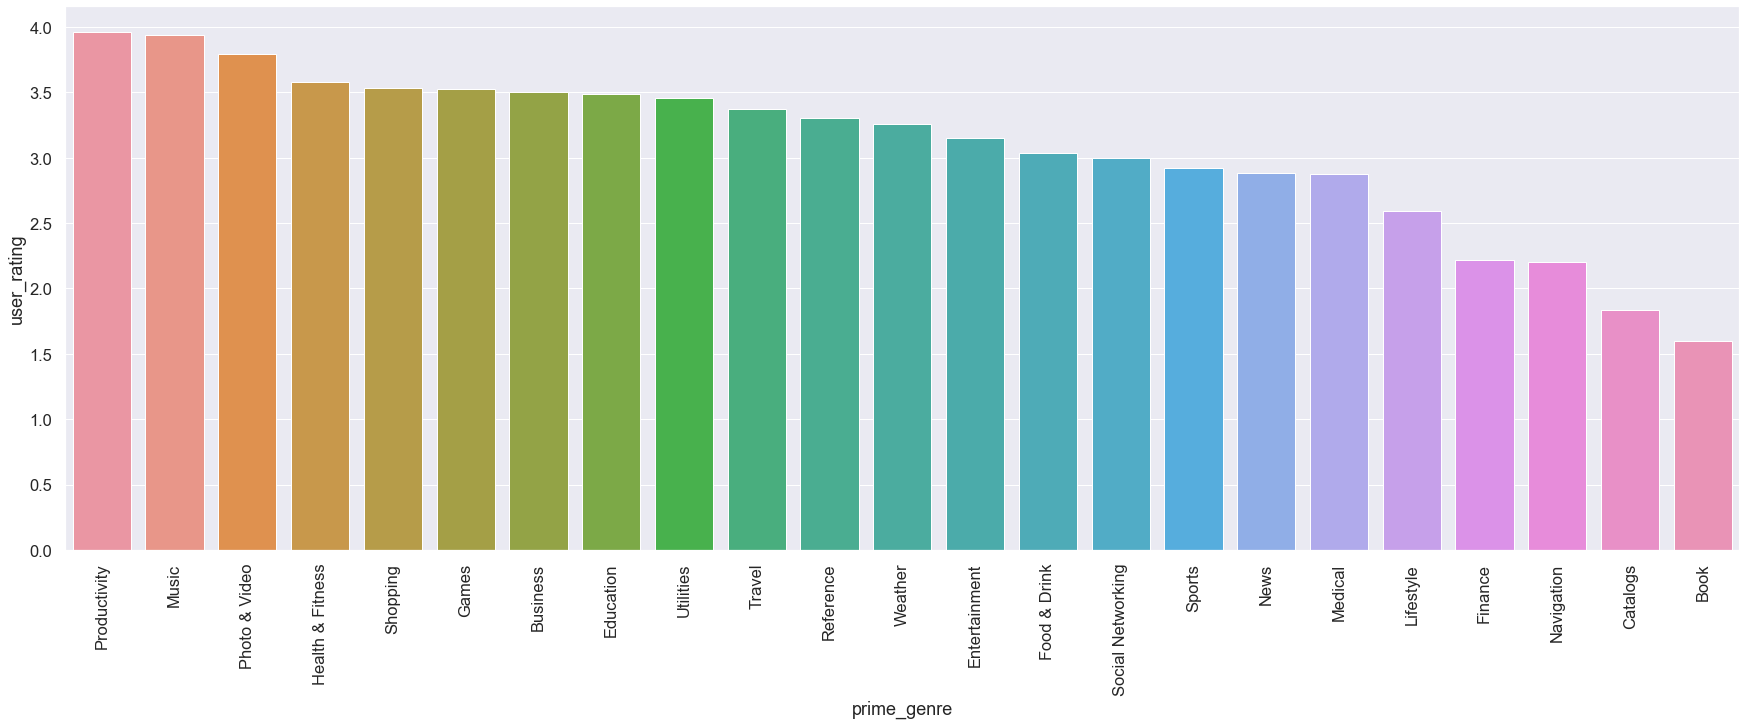

In [39]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x="prime_genre", y="user_rating", data=df_genre_vs_rating_free)

In [40]:
df_group_genre_vs_rating_notfree = df_app_notfree[['prime_genre', 'user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False)
df_genre_vs_rating_notfree = df_group_genre_vs_rating_notfree.reset_index()

In [41]:
df_genre_vs_rating_notfree.head()

,prime_genre,user_rating
0,Catalogs,4.500000
1,Shopping,4.500000
2,Productivity,4.030172
3,Music,4.014085
4,Games,3.904984


### Top 5 Paid Apps Grouped by Genre
1. Catalogs
2. Shopping
3. Productivity
4. Music
5. Games

<AxesSubplot:xlabel='prime_genre', ylabel='user_rating'>

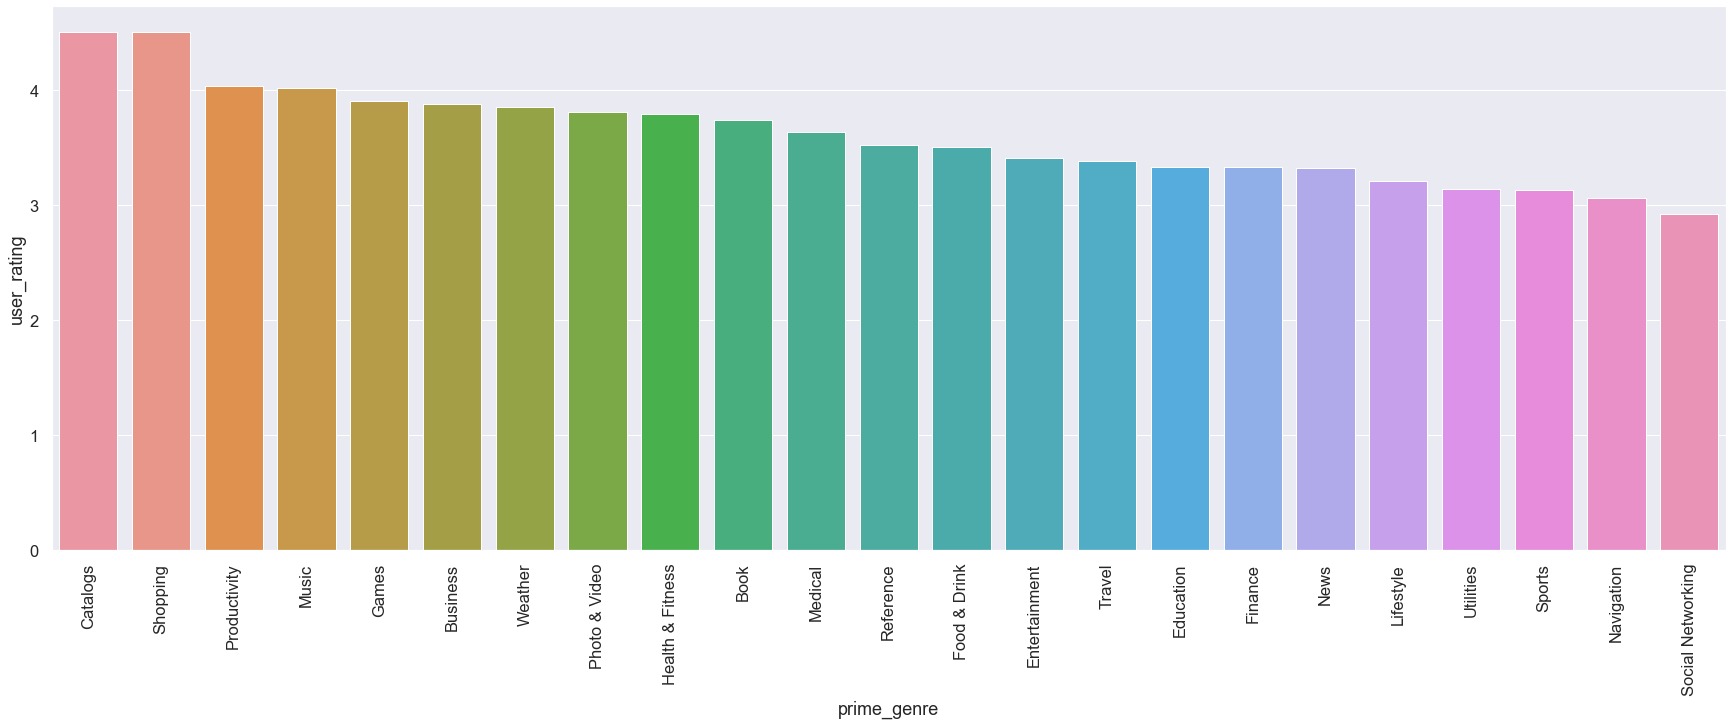

In [42]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x="prime_genre", y="user_rating", data=df_genre_vs_rating_notfree)

<AxesSubplot:xlabel='prime_genre', ylabel='user_rating'>

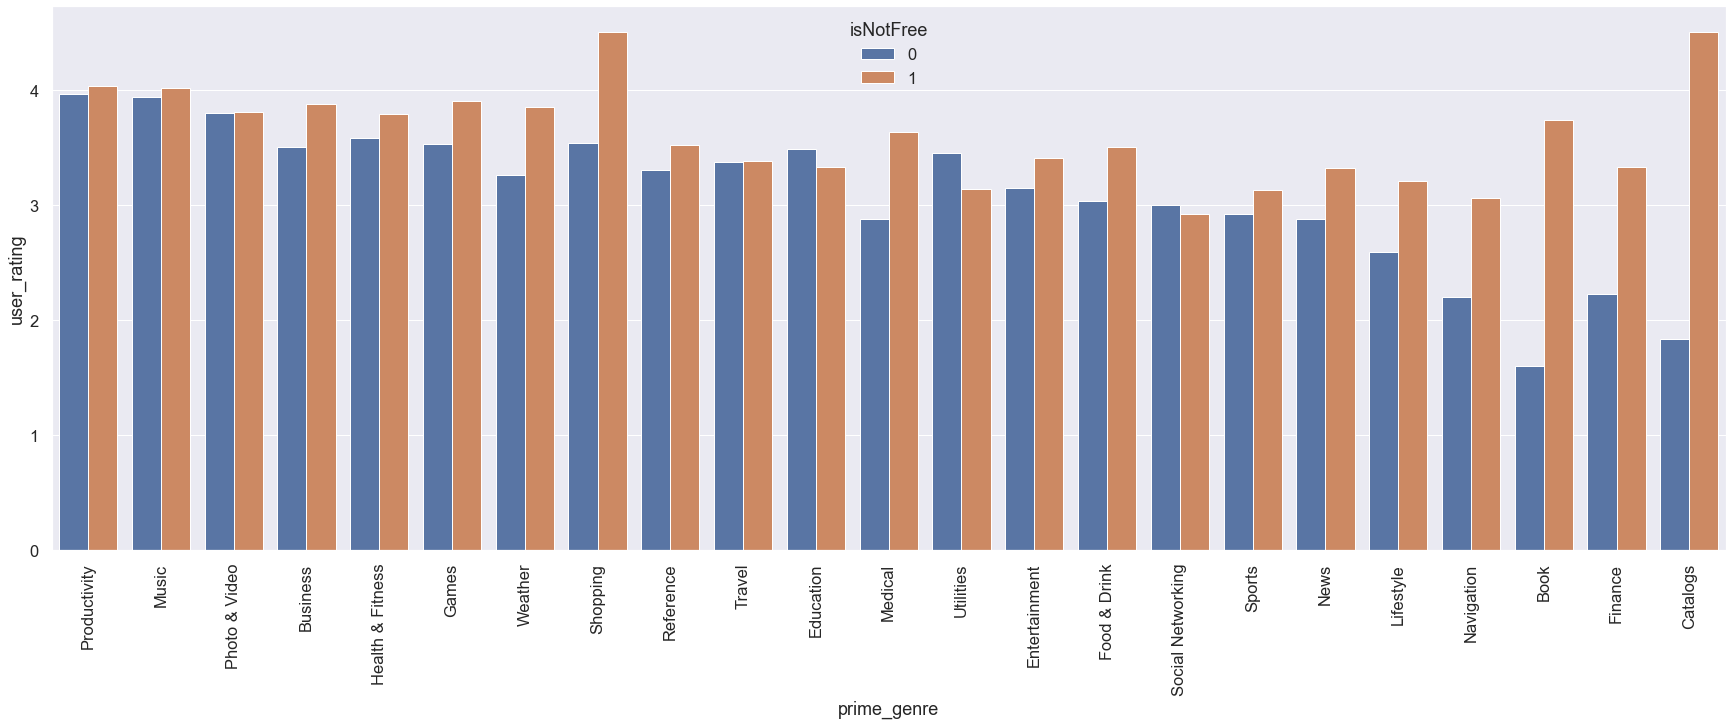

In [43]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x="prime_genre", y="user_rating", hue="isNotFree", data=df_app, ci=None, \
            order=df_app[['prime_genre', 'user_rating']].groupby('prime_genre').mean()\
            ['user_rating'].sort_values(ascending=False).index)

- In general apps have much higher ratings when they are paid
- Navigation, Book, Finance, and Catalogs have much higher ratings when they are paid
- Shopping has much higher rating when it is a paid app, however, there is only one paid shopping app is present in our data

## App Size vs Rating

<AxesSubplot:xlabel='user_rating', ylabel='size_bytes_in_MB'>

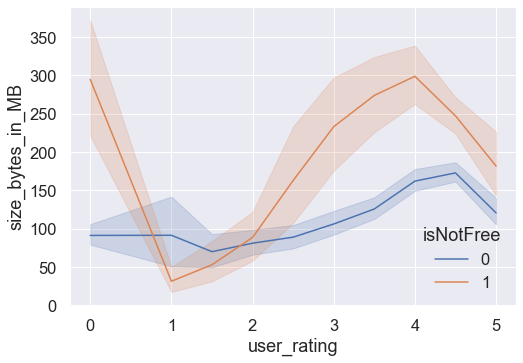

In [44]:
sns.lineplot(data=df_app, x="user_rating", y="size_bytes_in_MB", hue="isNotFree")

- Highest rated paid apps are between 150 MB - 300 MB in size
- Highest rated free apps are between 90 MB - 125 MB in size

<AxesSubplot:xlabel='size_bytes_in_MB', ylabel='Density'>

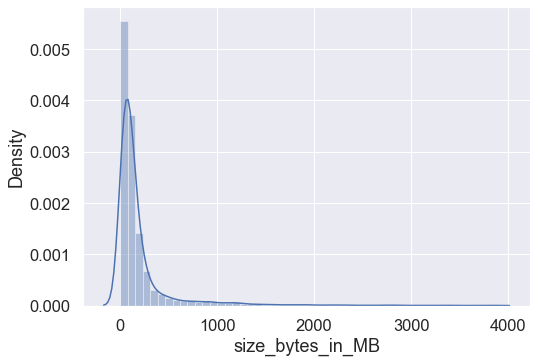

In [45]:
sns.distplot(df_app["size_bytes_in_MB"])

- Right skewed distribution plot
- Most apps are around 250 MB in size

<AxesSubplot:xlabel='size_bytes_in_MB'>

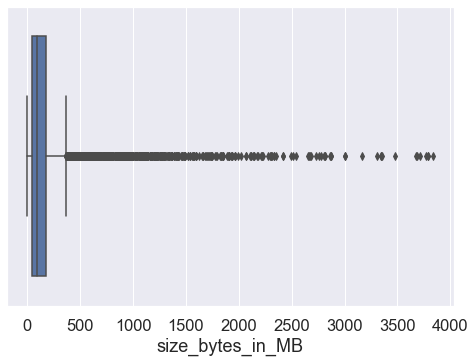

In [46]:
sns.boxplot(df_app["size_bytes_in_MB"])

- Most apps are around 250 MB in size
- Apps above 500 MB's are outliers (upper fence)

In [47]:
df_app['currency'].value_counts() # all currency is in USD

USD    7197
Name: currency, dtype: int64

In [48]:
df_app_notfree["price"].mean()

3.955297675899396

<AxesSubplot:xlabel='price', ylabel='Density'>

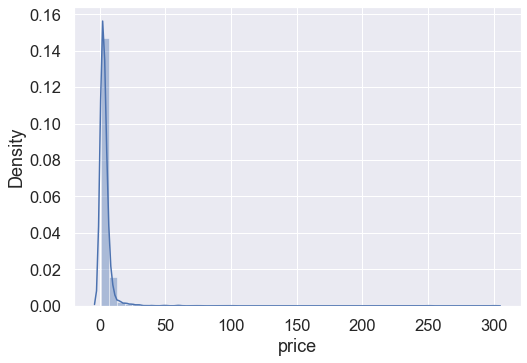

In [49]:
sns.distplot(df_app_notfree["price"])

- The distribution plot for price is right skewed
- Apps are mostly priced at around $4

<AxesSubplot:xlabel='price'>

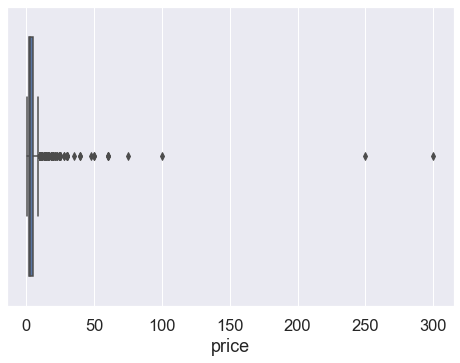

In [50]:
sns.boxplot(df_app_notfree["price"])

- Apps priced above $10 are upper fence outliers
- We can later calculate for IQR

## Prime Genre vs Success

<AxesSubplot:xlabel='prime_genre', ylabel='count'>

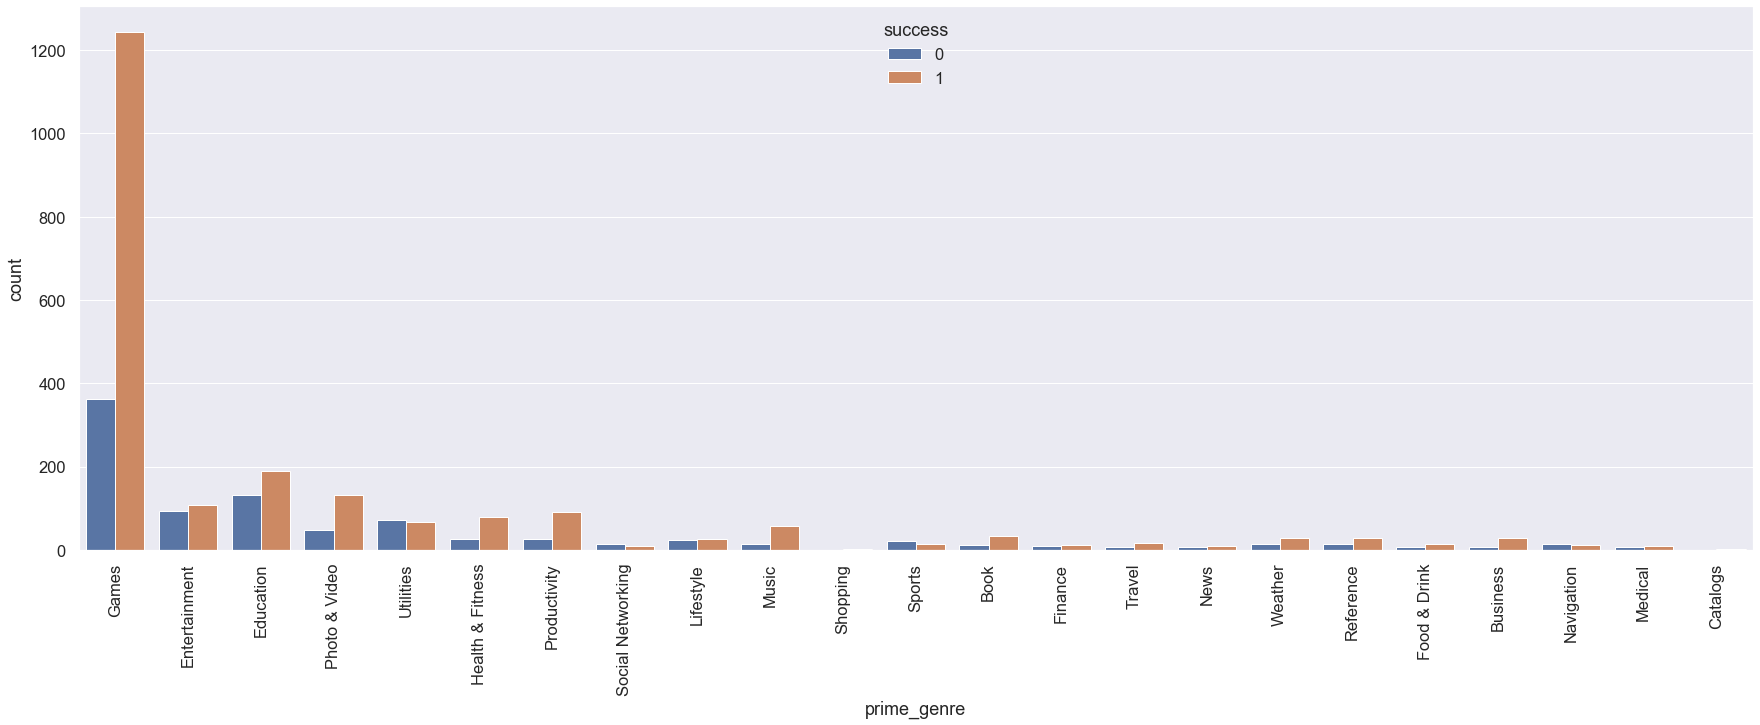

In [51]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.countplot(data=df_app_notfree, x="prime_genre", hue="success", order=df_app["prime_genre"].value_counts().index)

- Games, Education, Photo & Video, Health & Fitness, Productivity and Music are most likely to be a successful app
- Book, Travel, Weather, Reference, Food & Drink and Business apps are also most likely to be a niche successful app on the app store

<AxesSubplot:>

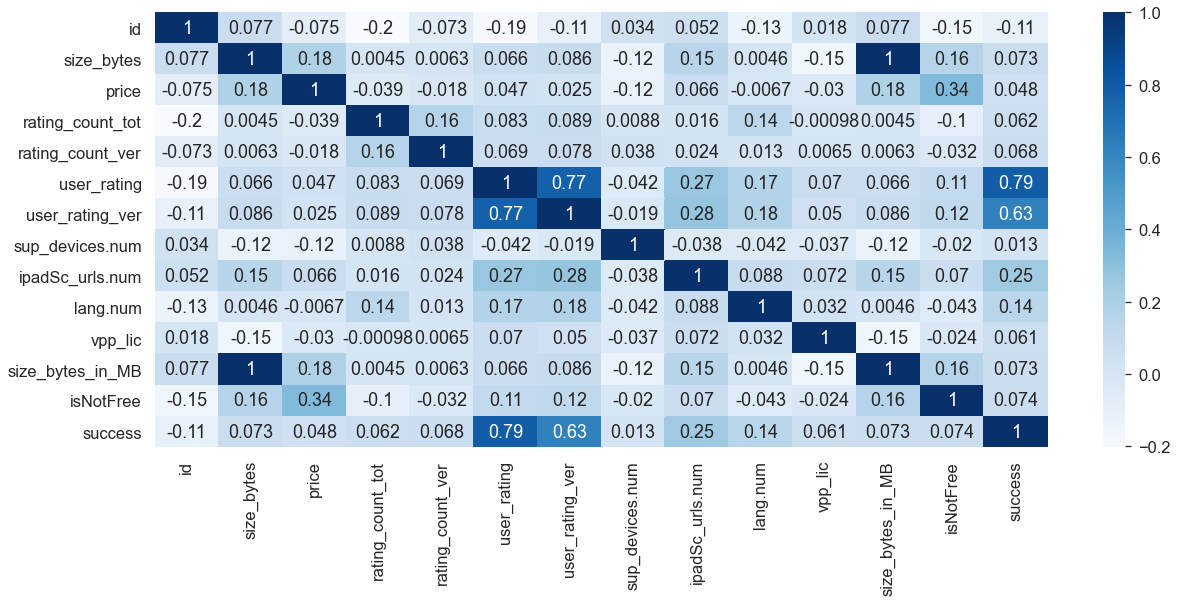

In [52]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_app.corr(), annot=True, cmap='Blues')

- None of the features are highly correlated except for similar feature attributes

In [53]:
df_app.corr()['success'].sort_values(ascending=False)

success             1.000000
user_rating         0.791901
user_rating_ver     0.627200
ipadSc_urls.num     0.248079
lang.num            0.144189
isNotFree           0.073816
size_bytes_in_MB    0.072963
size_bytes          0.072963
rating_count_ver    0.068054
rating_count_tot    0.062221
vpp_lic             0.060983
price               0.047866
sup_devices.num     0.012687
id                 -0.106701
Name: success, dtype: float64

## What kind of apps should companies produce?
- Companies should focus on producing more productivity, music, and photo & video apps if they want to cater customers interest on apps.
- For a higher chance of success companies can look to create games, education, photo & video, health & fitness, productivity and music apps.
- Companies should produce paid apps such as catalogs, productivity, music, and games app if they want to make more money.
- Companies should keep free apps less than 200 MB and paid apps less than 350 MB

## Feature Engineering

In [54]:
df_app.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,size_bytes_in_MB,isNotFree,success
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.119141,1,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,151.232422,0,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,95.867188,0,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,122.558594,0,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.476562,0,1


In [55]:
df_app['success'].value_counts() # imbalance dataset

1    4781
0    2416
Name: success, dtype: int64

### Feature that will be used
- size_bytes_in_MB
- isNotFree
- price
- sup_devices.num
- ipadSc_urls.num
- lang.num
- vpp_lic
- prime_genre

In [56]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
 16  app_desc          7197 non-null   object 


In [57]:
df_app['prime_genre'].value_counts() # binary encoder

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [58]:
transformer = ColumnTransformer([
    ('binary', ce.BinaryEncoder(), ['prime_genre']),
], remainder = 'passthrough')

In [59]:
transformer.fit_transform(df_app) # test transformer

array([[0, 0, 0, ..., 96.119140625, 1, 1],
       [0, 0, 0, ..., 151.232421875, 0, 1],
       [0, 0, 0, ..., 95.8671875, 0, 0],
       ...,
       [0, 0, 1, ..., 106.1650390625, 1, 1],
       [0, 0, 0, ..., 92.7314453125, 0, 1],
       [0, 0, 0, ..., 86.6875, 0, 1]], dtype=object)

## Train-test split

In [60]:
X = df_app[['size_bytes_in_MB', 'isNotFree', 'price', 'sup_devices.num', 'ipadSc_urls.num', \
           'lang.num', 'vpp_lic', 'prime_genre']]
y = df_app['success']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    stratify=y,
    test_size=0.2, 
    random_state=2020
)

- We want to minimalise fp where we predict it is going to be successful (1), but is not succesful (0)
- Therefore we use precision

In [62]:
def evaluate(models, scoring_method):
    model_names = []
    scores = []
    std_devs = []
    for name, model in models:
        estimator = Pipeline([
            ('transformer', transformer),
            ('model', model)
        ])
        skfold = StratifiedKFold(n_splits=5)
        score = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).mean()
        std = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).std()
        scores.append(score)
        std_devs.append(std)
        model_names.append(name)
        
    return pd.DataFrame({'Models': model_names, 'Cross Val Scores:': scores, 'Std Deviations': std_devs})

In [63]:
models = [
    ['Log Regression', LogisticRegression(solver='liblinear')],
    ['DecisionTree', DecisionTreeClassifier()],
    ['KNeighbours', KNeighborsClassifier(n_neighbors = 2)],
    ['RandomForest', RandomForestClassifier()]
]

In [64]:
evaluate(models, 'precision')

,Models,Cross Val Scores:,Std Deviations
0,Log Regression,0.717268,0.005919
1,DecisionTree,0.730988,0.006076
2,KNeighbours,0.742615,0.016777
3,RandomForest,0.738597,0.009895


In [65]:
def evaluate_scale(models, scoring_method):
    model_names = []
    scores = []
    std_devs = []
    for name, model in models:
        estimator = Pipeline([
            ('transformer', transformer),
            ('preprocess', MinMaxScaler()),
            ('model', model)
        ])
        skfold = StratifiedKFold(n_splits=5)
        score = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).mean()
        std = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).std()
        scores.append(score)
        std_devs.append(std)
        model_names.append(name)
        
    return pd.DataFrame({'Models': model_names, 'Cross Val Scores:': scores, 'Std Deviations': std_devs})

In [66]:
evaluate_scale(models, 'precision')

,Models,Cross Val Scores:,Std Deviations
0,Log Regression,0.717588,0.005695
1,DecisionTree,0.731673,0.009717
2,KNeighbours,0.770612,0.018926
3,RandomForest,0.738122,0.009545


In [67]:
from imblearn.pipeline import Pipeline

In [68]:
def evaluate_scale_smote(models, scoring_method):
    model_names = []
    scores = []
    std_devs = []
    for name, model in models:
        smote = SMOTE(random_state=1899)
        estimator = Pipeline([
            ('transformer', transformer),
            ('scaler', MinMaxScaler()),
            ('balancing', smote),
            ('model', model)
        ])
        skfold = StratifiedKFold(n_splits=5)
        score = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).mean()
        std = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).std()
        scores.append(score)
        std_devs.append(std)
        model_names.append(name)
        
    return pd.DataFrame({'Models': model_names, 'Cross Val Scores:': scores, 'Std Deviations': std_devs})

In [69]:
evaluate_scale_smote(models, 'precision')

,Models,Cross Val Scores:,Std Deviations
0,Log Regression,0.773347,0.011377
1,DecisionTree,0.733089,0.011660
2,KNeighbours,0.772846,0.019296
3,RandomForest,0.749842,0.015571


In [70]:
def evaluate_scale_nearmiss(models, scoring_method):
    model_names = []
    scores = []
    std_devs = []
    for name, model in models:
        nearmiss = NearMiss()
        estimator = Pipeline([
            ('transformer', transformer),
            ('scaler', MinMaxScaler()),
            ('balancing', nearmiss),
            ('model', model)
        ])
        skfold = StratifiedKFold(n_splits=5)
        score = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).mean()
        std = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).std()
        scores.append(score)
        std_devs.append(std)
        model_names.append(name)
        
    return pd.DataFrame({'Models': model_names, 'Cross Val Scores:': scores, 'Std Deviations': std_devs})

In [71]:
evaluate_scale_nearmiss(models, 'precision')

,Models,Cross Val Scores:,Std Deviations
0,Log Regression,0.754168,0.016891
1,DecisionTree,0.715295,0.010417
2,KNeighbours,0.764655,0.017424
3,RandomForest,0.737912,0.009148


## Precision Scores

### Knn without Scaler

In [72]:
model= KNeighborsClassifier(n_neighbors = 2)

estimator = Pipeline([
    ('transformer', transformer),
    ('model', model)])

estimator.fit(X_train,y_train)
precision_score(y_test,estimator.predict(X_test))

0.7598314606741573

### Knn with Scaler

In [73]:
model= KNeighborsClassifier(n_neighbors = 2)

estimator = Pipeline([
    ('transformer', transformer),
    ('scaler', MinMaxScaler()),
    ('model', model)])

estimator.fit(X_train,y_train)
precision_score(y_test,estimator.predict(X_test))

0.7745901639344263

- We achieve 1% higher precision score with scaler

### Logistc Regression with Scaler + SMOTE

In [74]:
model= LogisticRegression(solver = "liblinear")
smote = SMOTE(random_state=1899)

estimator = Pipeline([
    ('transformer', transformer),
    ('scaler', MinMaxScaler()),
    ('balancing', smote),
    ('model', model)])

estimator.fit(X_train,y_train)
precision_score(y_test,estimator.predict(X_test))

0.7761363636363636

### Random Forest with Scaler + SMOTE

In [75]:
model= RandomForestClassifier()
smote = SMOTE(random_state=1899)

estimator = Pipeline([
    ('transformer', transformer),
    ('scaler', MinMaxScaler()),
    ('balancing', smote),
    ('model', model)])

estimator.fit(X_train,y_train)
precision_score(y_test,estimator.predict(X_test))

0.7508021390374332

### Knn with Scaler + SMOTE

In [76]:
model= KNeighborsClassifier(n_neighbors = 2)
smote = SMOTE(random_state=1899)

estimator = Pipeline([
    ('transformer', transformer),
    ('scaler', MinMaxScaler()),
    ('balancing', smote),
    ('model', model)])

estimator.fit(X_train,y_train)
precision_score(y_test,estimator.predict(X_test))

0.7796352583586627

- Best Model is Knn with MinMaxScaler() and SMOTE()

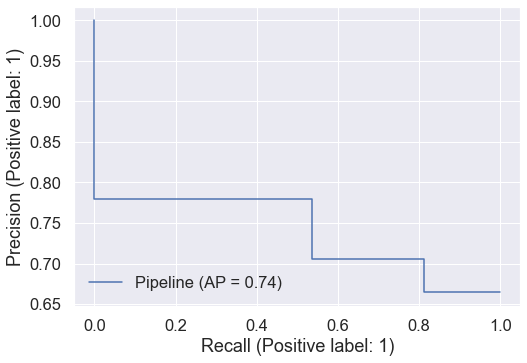

In [77]:
plot_precision_recall_curve(estimator,X_test,y_test)

### Hyperparameter Tuning

In [78]:
hyperparam_space = {
    'model__p': [1,2],
    'model__leaf_size': [5, 10, 30, 35],
    'model__n_neighbors': [2, 4, 6, 8, 10],
    'model__weights': ['uniform', 'distance']
}

In [79]:
model= KNeighborsClassifier(n_neighbors = 2)
smote = SMOTE(random_state=1899)

estimator = Pipeline([
    ('transformer', transformer),
    ('scaler', MinMaxScaler()),
    ('balancing', smote),
    ('model', model)]
)

skfold = StratifiedKFold(n_splits=5)
grid_search= GridSearchCV(estimator,param_grid=hyperparam_space,cv=skfold,scoring='precision',n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('binary',
                                                                         BinaryEncoder(),
                                                                         ['prime_genre'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('balancing', SMOTE(random_state=1899)),
                                       ('model',
                                        KNeighborsClassifier(n_neighbors=2))]),
             n_jobs=-1,
             param_grid={'model__leaf_size': [5, 10, 30, 35],
                         'model__n_neighbors': [2, 4, 6, 8, 10],
                         'model__p': [1, 2],
                         'model__weights': [

In [80]:
estimator.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('binary', BinaryEncoder(), ['prime_genre'])])),
  ('scaler', MinMaxScaler()),
  ('balancing', SMOTE(random_state=1899)),
  ('model', KNeighborsClassifier(n_neighbors=2))],
 'verbose': False,
 'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('binary', BinaryEncoder(), ['prime_genre'])]),
 'scaler': MinMaxScaler(),
 'balancing': SMOTE(random_state=1899),
 'model': KNeighborsClassifier(n_neighbors=2),
 'transformer__n_jobs': None,
 'transformer__remainder': 'passthrough',
 'transformer__sparse_threshold': 0.3,
 'transformer__transformer_weights': None,
 'transformer__transformers': [('binary', BinaryEncoder(), ['prime_genre'])],
 'transformer__verbose': False,
 'transformer__binary': BinaryEncoder(),
 'transformer__binary__cols': None,
 'transformer__binary__drop_invariant': False,
 'transformer__binary__handle_missing': '

In [81]:
grid_search.best_params_

{'model__leaf_size': 5,
 'model__n_neighbors': 10,
 'model__p': 2,
 'model__weights': 'uniform'}

In [82]:
grid_search.best_score_

0.7889088411515582

In [83]:
grid_search.best_estimator_.fit(X_train,y_train)
precision_score(y_test,grid_search.best_estimator_.predict(X_test))

0.7732962447844228

### Before Tuning

In [84]:
estimator.fit(X_train,y_train)
precision_score(y_test,estimator.predict(X_test))

0.7796352583586627

In [85]:
print(classification_report(y_test,estimator.predict(X_test)))

              precision    recall  f1-score   support

           0       0.43      0.70      0.53       483
           1       0.78      0.54      0.64       957

    accuracy                           0.59      1440
   macro avg       0.61      0.62      0.58      1440
weighted avg       0.66      0.59      0.60      1440



### After Tuning

In [86]:
grid_search.fit(X_train,y_train)
precision_score(y_test,grid_search.best_estimator_.predict(X_test))

0.7732962447844228

In [87]:
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.44      0.66      0.53       483
           1       0.77      0.58      0.66       957

    accuracy                           0.61      1440
   macro avg       0.61      0.62      0.60      1440
weighted avg       0.66      0.61      0.62      1440



- Almost no difference before and after hyperparameter tuning
- Model is improved with SMOTE() and MinMaxScaler()

## Saving Model

In [92]:
#Saving models
import pickle
import joblib

### With Pickle

In [93]:
grid_search.best_estimator_.fit(X,y) #Final Model, fit ke x dan y untuk memaksimalkan jumlah data yang dipelajari oleh model
#bisa ubah akurasi, tapi yang penting modelnya stabil

file_name = 'Mobile App Store Model.sav'

pickle.dump(grid_search.best_estimator_, open(file_name,'wb'))

### Predict with Saved Model

In [94]:
loaded_model = pickle.load(open(file_name, 'rb'))

In [95]:
loaded_model.predict(X_test)

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
# X = df_app[['size_bytes_in_MB', 'isNotFree', 'price', 'sup_devices.num', 'ipadSc_urls.num', \
#            'lang.num', 'vpp_lic', 'prime_genre']]

In [162]:
pacman = pd.DataFrame({
    'size_bytes_in_MB':[100],
    'isNotFree':[1],
    'price': [2.99],
    'sup_devices.num':[30],
    'ipadSc_urls.num':[5],
    'lang.num' : [10],
    'vpp_lic' : [1],
    'prime_genre': ['Games']
})
pacman

,size_bytes_in_MB,isNotFree,price,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,prime_genre
0,100,1,2.99,30,5,10,1,Games


In [163]:
loaded_model.predict(pacman)

array([1])

In [164]:
loaded_model.predict_proba(pacman)

array([[0.2, 0.8]])

In [152]:
### Mean user rating of paid games
df_app[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Games')]['user_rating'].mean()

3.9049844236760123

In [153]:
### Mean success of paid games
df_app[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Games')]['success'].mean()

0.7744548286604361

In [159]:
flappy = pd.DataFrame({
    'size_bytes_in_MB':[10],
    'isNotFree':[0],
    'price': [0],
    'sup_devices.num':[30],
    'ipadSc_urls.num':[5],
    'lang.num' : [1],
    'vpp_lic' : [1],
    'prime_genre': ['Games']
})
flappy

,size_bytes_in_MB,isNotFree,price,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,prime_genre
0,10,0,0,30,5,1,1,Games


In [160]:
loaded_model.predict(flappy)

array([1])

In [161]:
loaded_model.predict_proba(flappy)

array([[0.3, 0.7]])

In [157]:
### Mean user rating of free games
df_app[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Games')]['user_rating'].mean()

3.5285777580859548

In [158]:
### Mean success of free games
df_app[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Games')]['success'].mean()

0.7199822773593265

In [134]:
blablashop = pd.DataFrame({
    'size_bytes_in_MB':[100],
    'isNotFree':[0],
    'price': [0],
    'sup_devices.num':[37],
    'ipadSc_urls.num':[7],
    'lang.num' : [9],
    'vpp_lic' : [1],
    'prime_genre': ['Shopping']
})
blablashop

,size_bytes_in_MB,isNotFree,price,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,prime_genre
0,100,0,0,37,7,9,1,Shopping


In [136]:
loaded_model.predict(blablashop)

array([0])

In [165]:
loaded_model.predict_proba(blablashop)

array([[0.5, 0.5]])

In [166]:
### Mean user rating of free shopping app
df_app[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Shopping')]['user_rating'].mean()

3.5330578512396693

In [167]:
### Mean success of free shopping app
df_app[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Shopping')]['success'].mean()

0.628099173553719

### With Joblib

In [169]:
# saving model
joblib.dump(grid_search.best_estimator_,'model_mobile_app_store_joblib')

['model_mobile_app_store_joblib']

In [170]:
#load model
model_joblib = joblib.load('model_mobile_app_store_joblib')

In [171]:
#predict
model_joblib.predict(pacman)

array([1])

In [172]:
model_joblib.predict_proba(pacman)

array([[0.2, 0.8]])

### Feedback:
- Taro di web
- Kalkulasi outlier
- Tambah fitur cont_rating